In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
# decode it back to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [4]:
# preparing the data


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
# multiclass classification -> dimensionality of output space = 46
# use reasonable intermediate layers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # network will output a probability distribution
# The 46 scores will sum to 1

In [9]:
# compiling your network
# The best loss function to use in this case is categorical_crossentropy.
# It measures the distance between two probability distributions
model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics =['accuracy'])

In [10]:
# validation approach, set aside 1000 samples
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
# train network with 20 epochs

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 104us/step - loss: 2.6653 - accuracy: 0.5119 - val_loss: 1.7142 - val_accuracy: 0.6490
Epoch 2/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.3929 - accuracy: 0.7126 - val_loss: 1.2856 - val_accuracy: 0.7280
Epoch 3/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.0092 - accuracy: 0.7855 - val_loss: 1.1226 - val_accuracy: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.7970 - accuracy: 0.8320 - val_loss: 1.0142 - val_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.6370 - accuracy: 0.8685 - val_loss: 0.9518 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5046 - accuracy: 0.8969 - val_loss: 0.9233 - val_accuracy: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.41

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

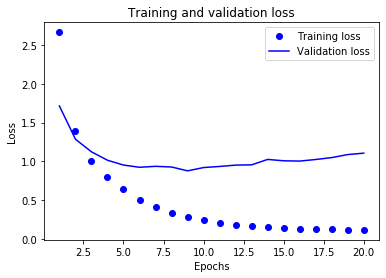

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

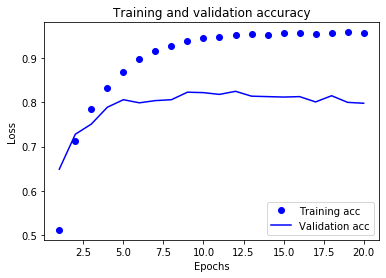

In [14]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
# the Nn starts overfitting after 8 epochs, lets train the network from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation ='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(46, activation ='softmax'))

model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics =['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 8, validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)



Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 246us/step - loss: 1.4580 - accuracy: 0.6858 - val_loss: 1.0815 - val_accuracy: 0.7710
Epoch 2/8
7982/7982 [==============================] - 2s 262us/step - loss: 0.7579 - accuracy: 0.8344 - val_loss: 0.9268 - val_accuracy: 0.8070
Epoch 3/8
7982/7982 [==============================] - 2s 277us/step - loss: 0.4790 - accuracy: 0.8956 - val_loss: 0.9077 - val_accuracy: 0.8200
Epoch 4/8
7982/7982 [==============================] - 3s 332us/step - loss: 0.3299 - accuracy: 0.9273 - val_loss: 0.9559 - val_accuracy: 0.8150
Epoch 5/8
7982/7982 [==============================] - 3s 341us/step - loss: 0.2589 - accuracy: 0.9397 - val_loss: 1.0080 - val_accuracy: 0.8100
Epoch 6/8
7982/7982 [==============================] - 3s 347us/step - loss: 0.2151 - accuracy: 0.9486 - val_loss: 1.1656 - val_accuracy: 0.8110
Epoch 7/8
7982/7982 [==============================] - 3s 346us/step - loss: 0.194

In [16]:
results

[1.377554516439871, 0.7782725095748901]

In [18]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy)))/len(test_labels)

0.20035618878005343

In [20]:
# Generating prediction on new data
predictions = model.predict(x_test) # Each entry in predictions is a vector of length 46
predictions[0].shape

# The coefficients in this vector sum to 1
print(np.sum(predictions[0]))

0.9999999


In [21]:
# The largest entry(class with the highest probability) is the predicted class
np.argmax(predictions[0])

3

In [24]:
# another way of handling labels and the loss -> cast them as integers
y_train = np.array(train_labels)
x_train = np.array(test_labels)

# This would change the loss function -> sparse_categorical_crossentropy
model.compile(optimizer ='rmsprop', loss ='sparse_categorical_crossentropy', metrics =['acc'])
